In [1]:
import numpy as np
import scipy
from scipy.io import wavfile
from numpy.fft import fft, ifft, fftshift
import librosa 
import librosa.display
from scipy.signal import hamming, hann, freqz
from matplotlib import pyplot as plt
from scipy.fftpack import dct

from audiolazy import lazy_lpc as lpc


In [2]:
# Problem 1
audio, fs=librosa.load('audio.wav', sr=None)   

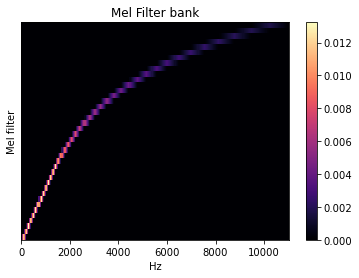

In [3]:
# Creating mel filter bank

N_fft = 512
N_mel = 40
mel_filter = librosa.filters.mel(fs,N_fft,N_mel)

# Plotting mel filter bank

fig, ax = plt.subplots()
img = librosa.display.specshow(mel_filter,x_axis = 'linear', ax = ax)
ax.set(ylabel = 'Mel filter', title = 'Mel Filter bank')
fig.colorbar(img,ax = ax)


# Report observation of mel filterbank
# MelFilter represents an acoustic time-frequency representation of a sound
# mels = 2595 * log10 (1 + hertz / 700),
# When the frequency goes up the filter value gets lower

In [4]:
# Problem 2
# 2.a

alpha = 0.97
pre_emphasis = np.append(audio[0], audio[1:]-alpha*audio[:-1])
print(len(pre_emphasis),len(audio))

40000 40000


In [5]:
# 2.b
inInd = 0
wLen = int(0.02*fs) # 20 ms window

win = hamming(wLen) # hamming window for example
nfft = 1024
numframes = np.ceil( (len(pre_emphasis)-wLen)/(wLen/2)) # number of frames

while inInd< len(pre_emphasis)-wLen:

        # audio frame
        frame = pre_emphasis[inInd:inInd+wLen]* win

        # Compute DFT spectrum
        dft = fft(frame,nfft)
        # taking the first half
        dft = dft[0:nfft//2]
        dft = 20 *np.log10(np.abs(dft)**2) # in dB scale

        inInd = inInd + int(wLen/2) # frame advance
        mel_spectrum = dft*mel_filter
        mel_dB = 20 *np.log10(np.abs(mel_spectrum))
        
        plt.plot(mel_dB)

        plt.plot(np.linspace(0, fs/2, nfft//2, endpoint = False), dft) 
        # plot vocal tract freq response or LP spectral envelope
        mfcc = dct(mel_dB, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] 

        
#https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

ValueError: operands could not be broadcast together with shapes (512,) (40,257) 

[Text(0.5, 1.0, 'MFCC')]

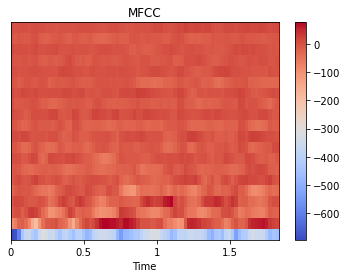

In [6]:
# 2.d
lib_mfcc = librosa.feature.mfcc(y=pre_emphasis, sr=fs, n_mels = 128)
fig, ax = plt.subplots()

img = librosa.display.specshow(lib_mfcc, x_axis='time', ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='MFCC')